<b>Disclaimer:</b>
This is a tutorial where we demonstrate how to use the Reddit API to find mental health related posts. This is just a demonstration of how to extract data from Reddit, and not intended as a serious or well charactized product or reasearch. Do not draw conclusions from this. The analysis here is very rudimentary. This is mainly meant to be a tutorial on how to obtain the data, rather than how to draw any conclusions from it. 
<hr>
That out of the way, here's what we'll be doing in this learning element:
<ul>
    <li>Set up a developer app on reddit</li>
    <li>Pull a list of posts containing mental health related keywords from the UWaterloo subreddit</li>
    <li>Plot the number of posts containing these keywords over time</li>
 </ul>

<h2>1. Set Up Development App</h2>
<p>The first thing we need to do is get set up a developer app. We are going to use a python package called PRAW to make it more straightforward to use the API. API is a an accronym for applicaiton programming interface, which allows you to create a application that interacts directly with reddit's data. </p>
<p>To register your app, start by going to <a href="https://www.reddit.com"> reddit</a>. Make account if you don't have one yet, then go <a href="https://www.reddit.com/prefs/apps"> here </a>. and click create an app at the bottom. Give your app a name, a description, choose script and use localhost:888 as your redirect link. This is your own computer, since we are not hosting it anywhere. </p>
<p>You should then get a 14 character personal use script, and a 27 character secret key. </p> See this <a href=""> page </a> if you don't know what I'm talking about.

We will be using the following three python packages: praw, pandas, and datetime. Make sure to install these. On the commandline this can be done using the following: 

In [8]:
pip install praw
pip install pandas as pd
pip install datetime as dt

SyntaxError: invalid syntax (<ipython-input-8-18eaac3950c8>, line 1)

In python, import the packages you will be using. 

In [2]:
import praw
import pandas as pd
import datetime as dt
%matplotlib inline

Now you'll need to get the app started in python. Run the following filling in the values denoted by <> with your own.

In [3]:
reddit = praw.Reddit(client_id='<14 character personal use script>', \
                     client_secret='<27 character secret key>', \
                     user_agent='<name of your app>', \
                     username='<Your reddit login username>', \
                     password='<Your reddit password>')

In the next few lines of code, we'll look in the uwaterloo subreddit, and find the 100 <i>(default)</i> most recent posts containing the word depressed in the title, or description of the post. Normally, you'll want to use more key words, and a also include impartional matches. There are ways to do this, but we won't get into that. 

In [5]:
subreddit = reddit.subreddit('uwaterloo')

In [6]:
depression_subreddit = subreddit.search("depressed", sort="new")

If we want to store the information we just stored, we can store it in a python dictionary. We first make a dictionary, and define the fields we want to store. Then we use a loop to go through the posts and store them in the dictionary. 

In [7]:
depression_posts_dict = { "title":[], 
                "score":[], 
                "id":[], 
                "url":[], 
                "comms_num": [], 
                "created": [],
                "body":[]}

In [8]:
for submission in depression_subreddit:
    depression_posts_dict["title"].append(submission.title)
    depression_posts_dict["score"].append(submission.score)
    depression_posts_dict["id"].append(submission.id)
    depression_posts_dict["url"].append(submission.url)
    depression_posts_dict["comms_num"].append(submission.num_comments)
    depression_posts_dict["created"].append(submission.created)
    depression_posts_dict["body"].append(submission.selftext)

We then store the dictionary as a pandas dataframe. Pandas is used commonly in data science, work work and manipulate data. We use it here for that exact reason. Then we preview the dataframe with the head() method. 

In [9]:
topics_data = pd.DataFrame(depression_posts_dict)

In [10]:
topics_data.head(5)

,title,score,id,url,comms_num,created,body
0,Bell Let's Talk raises awareness of mental hea...,67,aliktj,https://www.reddit.com/r/uwaterloo/comments/al...,16,1.548917e+09,This post is more aimed towards fixing depress...
1,Feeling alone When others are around,9,ajz486,https://www.reddit.com/r/uwaterloo/comments/aj...,3,1.548519e+09,I can't get rid of this empty feeling in my he...
2,"Anyone in London, ON for co-op and wants to ha...",6,ajuzdu,https://www.reddit.com/r/uwaterloo/comments/aj...,4,1.548487e+09,I’m depressed and lonely af thanks
3,ww megathread?,43,aiskxl,https://www.reddit.com/r/uwaterloo/comments/ai...,25,1.548226e+09,when's the megathread comin im looking to get ...
4,Coop depression hitting me like a truck,20,agtikq,https://www.reddit.com/r/uwaterloo/comments/ag...,6,1.547724e+09,Finally got a coop job I thought would be grea...


We see that the date the post was created is in a non-human readable format. Here we define a function to help us convert it into something more easy on the eyes. 

In [11]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)

In [12]:
topics_data.created = topics_data["created"].apply(get_date)

In [13]:
topics_data.sort_values(by=['created'], inplace=True)

In [14]:
topics_data.head(5)

,title,score,id,url,comms_num,created,body
99,So i got antidepressants buut,11,8is160,https://www.reddit.com/r/uwaterloo/comments/8i...,25,2018-05-12 03:06:22,I’m scared to take them.. what if they make me...
98,Is Waterloo Fun?,0,8j7zq9,https://www.reddit.com/r/uwaterloo/comments/8j...,16,2018-05-14 03:46:04,I recently got accepted into AFM and it looks ...
97,How to stay positive?,19,8lo6r4,https://www.reddit.com/r/uwaterloo/comments/8l...,10,2018-05-24 04:01:06,Been feeling really down as of late. Constantl...
96,I would like to go to a sauna once,6,8ly05w,https://www.reddit.com/r/uwaterloo/comments/8l...,18,2018-05-25 05:33:49,"I am depressed, maybe it would help.\n\nOr doe..."
95,I just realized I’ve been depressed since I was 4,11,8m6svr,https://www.reddit.com/r/uwaterloo/comments/8m...,6,2018-05-26 05:30:27,Literally. I remember feeling the exact same w...


Now, we make a new data frame to store counts of how many depression posts were made each month. 

In [15]:
todays_date = dt.datetime.now().date()
dates = pd.date_range('2018-04-30', periods=10, freq='M')

In [16]:
count_df = pd.DataFrame(columns = ['date',"counts"])

In [17]:
count_df["date"]=dates
count_df["counts"]=0

This final step, goes through the posts and checks if the date created is in a particular month, and then adds to the count for that month. 

In [19]:
for post_date in topics_data.created:
    for index in count_df.index:
        date= count_df.loc[index,'date']
        if str(date)[0:7]==str(post_date)[0:7]:
            count_df.loc[index,'counts']+=1

Finally, we end up with a count table which we can plot to see if there are any trends in the number of posts containing "depressed" over time. 

In [20]:
count_df

,date,counts
0,2018-04-30,0
1,2018-05-31,6
2,2018-06-30,12
3,2018-07-31,12
4,2018-08-31,8
5,2018-09-30,10
6,2018-10-31,11
7,2018-11-30,11
8,2018-12-31,16
9,2019-01-31,14


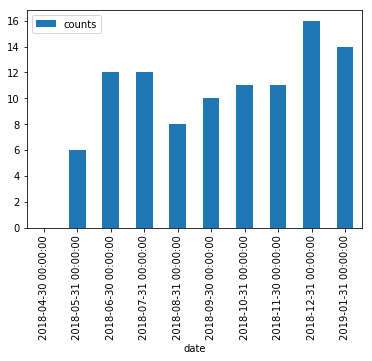

In [22]:
count_df.plot(kind="bar", x="date", y="counts")

That's all for this tutorial. Now, keep in mind, this was just for demonstration purposes of how to pull data from reddit for purpose of disease surveillance, and prep it for analysis. What we did here is very simplistic and, you can't draw any conclusions from it. We need to adust for the growth in users, and total number of posts each month etc. to get a realistic picture of whether depression related posts are on the rise, and if the trend is even significant. We would also, need to have a more stringent criteria for what determines a depression related post (some of those posts just have the word depressed, but don't have much to do with depression). But, what we do show here is, how an API can be used get data for disease surveilance. Analysis is often much trickier and often requires more domain expertise. Hope you enjoyed it!